# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berezovyy
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | muzaffarpur
Processing Record 6 of Set 1 | tilisarao
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | nogliki
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | chinde
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | enriquillo
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | hoi an
Processing Record 21 of Set 1 | paracuru
Processing Record 22 of Set 1 | pak kret
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | santa rosa de cabal
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | shetpe
Processing Record 42 of Set 4 | nieuw amsterdam
Processing Record 43 of Set 4 | ola
Processing Record 44 of Set 4 | shizunai-furukawacho
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | kolonia town
Processing Record 47 of Set 4 | jindabyne
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | talcahuano
Processing Record 0 of Set 5 | byron bay
Processing Record 1 of Set 5 | changtu
Processing Record 2 of Set 5 | kailua-kona
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | lamu
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | nurota
Processing Record 7 of Set 5 | messini
Processing Record 8 of Set 5 | choibalsan
Processing Record 9 of Set 5 | sabirabad
Processing Record 10 of Set 5 | cinisi
Processing Record 11 of Set 5 | tsiombe
Processing Record 12 of

Processing Record 30 of Set 8 | charlotte amalie
Processing Record 31 of Set 8 | napanee
Processing Record 32 of Set 8 | betio village
Processing Record 33 of Set 8 | hardys memories of africa
City not found. Skipping...
Processing Record 34 of Set 8 | gray
Processing Record 35 of Set 8 | santa ana de yacuma
Processing Record 36 of Set 8 | new richmond
Processing Record 37 of Set 8 | nikol'sk
Processing Record 38 of Set 8 | missoula
Processing Record 39 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | anda
Processing Record 42 of Set 8 | lihue
Processing Record 43 of Set 8 | boise
Processing Record 44 of Set 8 | shingu
Processing Record 45 of Set 8 | francisco i. madero
Processing Record 46 of Set 8 | almodovar del campo
Processing Record 47 of Set 8 | mossel bay
Processing Record 48 of Set 8 | vila franca do campo
Processing Record 49 of Set 8 | kargasok
Processing Record 0 of Set 9 | kolonia
Processing Record 1 of S

Processing Record 19 of Set 12 | jiangzi
Processing Record 20 of Set 12 | ishim
Processing Record 21 of Set 12 | natal
Processing Record 22 of Set 12 | inirida
Processing Record 23 of Set 12 | kuanda
Processing Record 24 of Set 12 | paka
Processing Record 25 of Set 12 | whangarei
Processing Record 26 of Set 12 | hemsby
Processing Record 27 of Set 12 | inarajan village
Processing Record 28 of Set 12 | salinas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berezovyy,51.6667,135.7000,-9.03,68,94,1.34,RU,1699720340
1,badger,64.8000,-147.5333,-8.07,73,100,1.54,US,1699720341
2,margaret river,-33.9500,115.0667,12.18,69,82,6.67,AU,1699720341
3,bengkulu,-3.8004,102.2655,23.97,93,14,1.59,ID,1699720341
4,muzaffarpur,26.1167,85.4000,23.07,53,0,2.39,IN,1699720341


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berezovyy,51.6667,135.7000,-9.03,68,94,1.34,RU,1699720340
1,badger,64.8000,-147.5333,-8.07,73,100,1.54,US,1699720341
2,margaret river,-33.9500,115.0667,12.18,69,82,6.67,AU,1699720341
3,bengkulu,-3.8004,102.2655,23.97,93,14,1.59,ID,1699720341
4,muzaffarpur,26.1167,85.4000,23.07,53,0,2.39,IN,1699720341


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

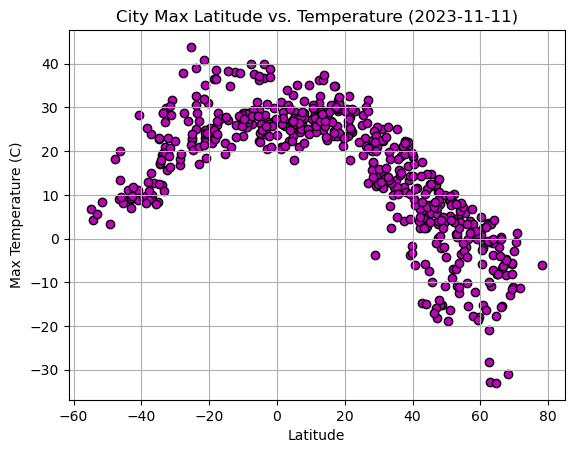

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',facecolors="m",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

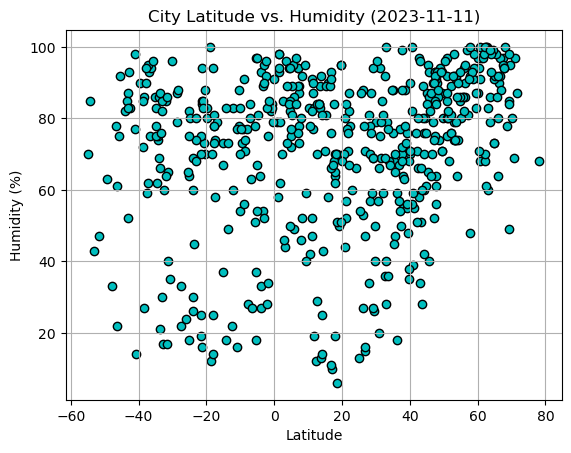

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',facecolors="c",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

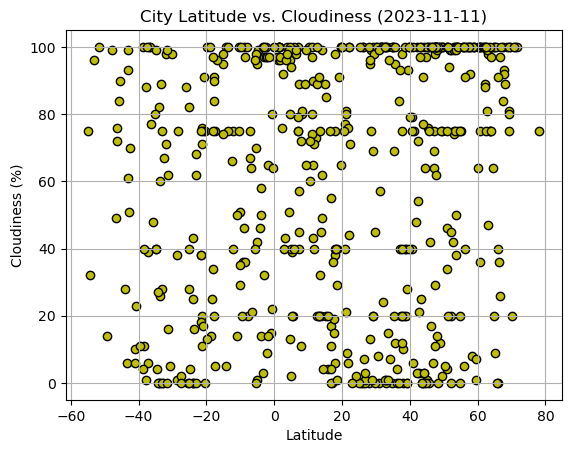

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',facecolors="y",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

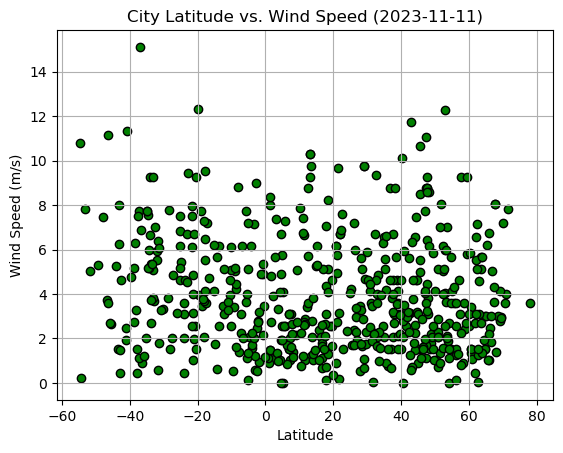

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',facecolors="g",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def linreg(df,x_column,y_column,annotation_x,annotation_y):
    x_values = df[x_column]
    y_values = df[y_column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker='o',facecolors="m",edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(lin_eq,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [61]:
#added by accident oops!

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berezovyy,51.6667,135.7000,-9.03,68,94,1.34,RU,1699720340
1,badger,64.8000,-147.5333,-8.07,73,100,1.54,US,1699720341
4,muzaffarpur,26.1167,85.4000,23.07,53,0,2.39,IN,1699720341
6,olonkinbyen,70.9221,-8.7187,1.25,97,100,4.00,SJ,1699720342
7,nogliki,51.8333,143.1667,-7.03,81,99,8.05,RU,1699720342


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,12.18,69,82,6.67,AU,1699720341
3,bengkulu,-3.8004,102.2655,23.97,93,14,1.59,ID,1699720341
5,tilisarao,-32.7329,-65.2911,29.91,17,0,3.67,AR,1699720341
9,port-aux-francais,-49.3500,70.2167,3.42,63,14,5.30,TF,1699720342
11,waitangi,-43.9535,-176.5597,11.11,82,28,5.24,NZ,1699720342


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.85618788020309


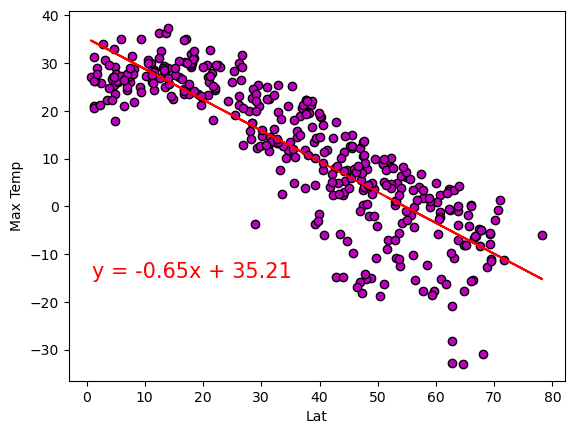

In [69]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df,"Lat","Max Temp",1,-15)

The r-value is: 0.4121057168607245


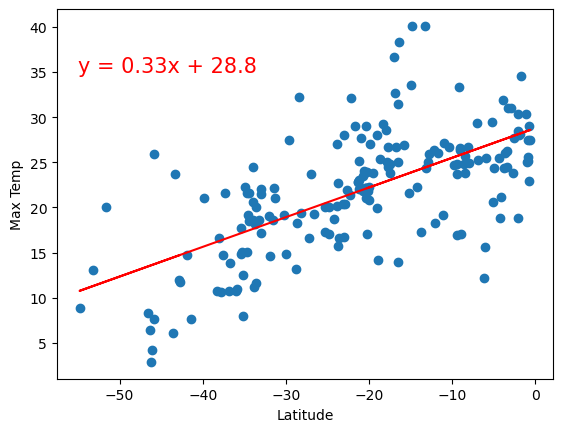

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


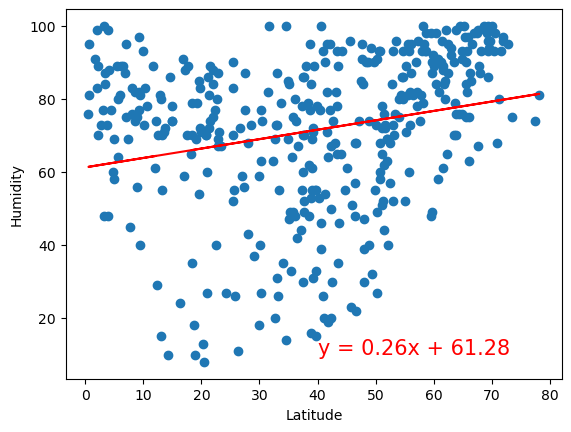

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


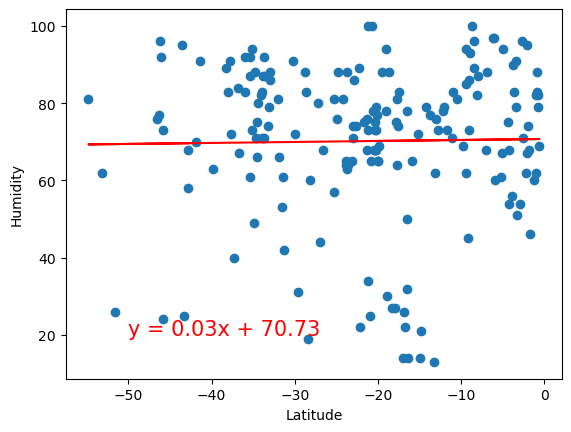

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


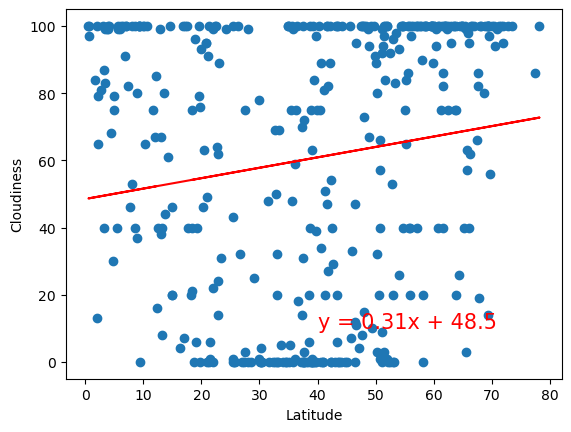

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


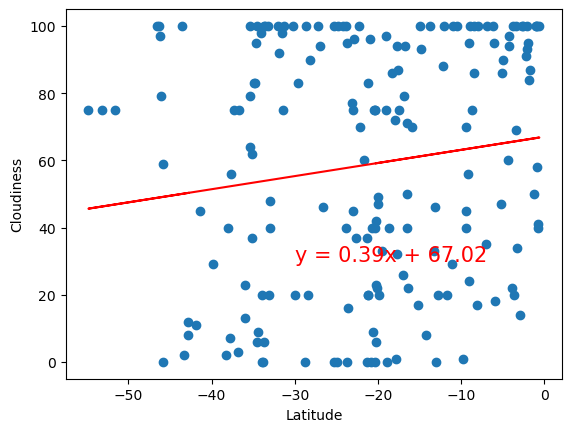

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


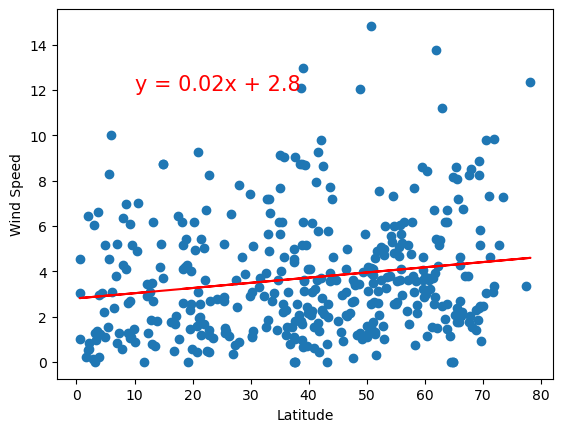

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


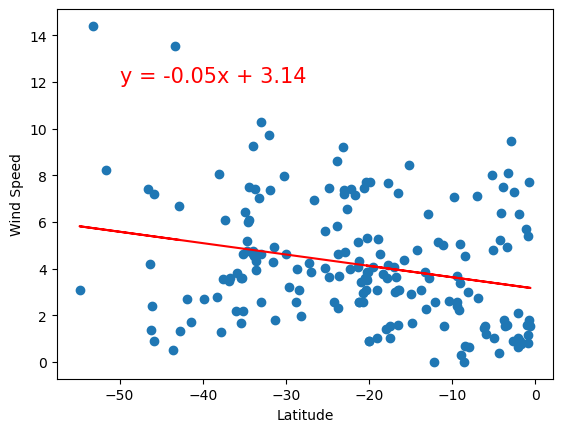

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE